In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from sympy import *

In [19]:
def First_Fridmann_Equation(z,omega_M, omega_R, omega_lambda):
    return np.sqrt(omega_M*(1+z)**3 + omega_R*(1+z)**4 + omega_lambda)


In [46]:
# Comoving Distance
def r(z, omega_M = 0, omega_R = 0, omega_lambda = 0):
    result = quad(lambda x: 1.0/First_Fridmann_Equation(x, omega_M=omega_M, omega_R=omega_R, omega_lambda=omega_lambda),
                  0, z )
    return result[0]

In [28]:
def Luminosity_dist(z,r):
    eq = (1+z)*r
    return eq

In [29]:
def Angular_dist(z,r):
    eq = r/(1+z) 
    return eq

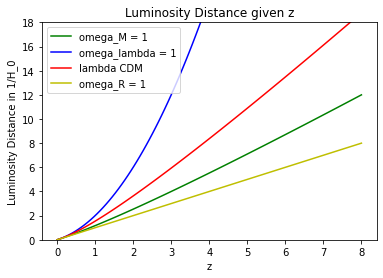

In [66]:
zs = np.linspace(0, 8, 100)
Lum_dist_M = []
Lum_dist_lambda =[]
Lum_dist_lambdaCDM = []
Lum_dist_R = []
for z in zs:
    Lum_dist_M.append(Luminosity_dist(z, r(z, omega_M = 1, omega_R = 0, omega_lambda = 0)))
    Lum_dist_lambda.append(Luminosity_dist(z, r(z,omega_M = 0, omega_R = 0,omega_lambda=1)))
    Lum_dist_lambdaCDM.append(Luminosity_dist(z, r(z,omega_M=0.3, omega_R = 0,omega_lambda=0.7)))
    Lum_dist_R.append(Luminosity_dist(z, r(z,omega_M=0,omega_R=1,omega_lambda=0)))

plt.plot(zs, Lum_dist_M, 'g', label='omega_M = 1')
plt.plot(zs, Lum_dist_lambda, 'b', label='omega_lambda = 1')
plt.plot(zs, Lum_dist_lambdaCDM, 'r', label='lambda CDM')
plt.plot(zs, Lum_dist_R, 'y', label='omega_R = 1')
plt.legend(loc='upper left')
plt.xlabel('z')
plt.ylabel('Luminosity Distance in 1/H_0')
plt.ylim(0, 18)
plt.title('Luminosity Distance given z')
plt.plot()

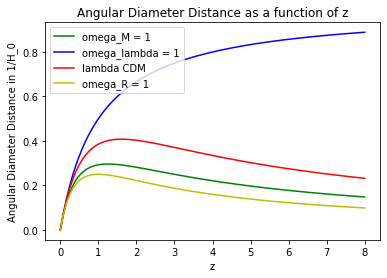

In [70]:
Ang_dist_M = []
Ang_dist_lambda = []
Ang_dist_lambdaCDM = []
Ang_dist_R = []
for z in zs:
    Ang_dist_M.append(Angular_dist(z, r(z,omega_M=1, omega_R = 0, omega_lambda = 0)))
    Ang_dist_lambda.append(Angular_dist(z, r(z,omega_M=0, omega_R = 0, omega_lambda = 1)))
    Ang_dist_lambdaCDM.append(Angular_dist(z, r(z,omega_M=0.3, omega_R = 0, omega_lambda = 0.7)))
    Ang_dist_R.append(Angular_dist(z, r(z,omega_M=0, omega_R = 1, omega_lambda = 0)))
plt.plot(zs, Ang_dist_M, 'g', label='omega_M = 1')
plt.plot(zs, Ang_dist_lambda, 'b', label='omega_lambda = 1')
plt.plot(zs, Ang_dist_lambdaCDM, 'r', label='lambda CDM')
plt.plot(zs, Ang_dist_R, 'y', label='omega_R = 1')
plt.legend(loc='upper left')
plt.xlabel('z')
plt.ylabel('Angular Diameter Distance in 1/H_0')
plt.title('Angular Diameter Distance as a function of z')
plt.plot()